In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("recipes_82k.csv")

In [3]:
#selecting instructions and ingredients cols
col = ['cooking_method', 'ingredients']
dataset = dataset[col]

#combine steps and ingredients
df1 = dataset['cooking_method']
df2 = dataset['ingredients']
df1.columns = ['Text']
df2.columns = ['Text']
dataset = df1.append(df2)
dataset = dataset.to_frame(name = 'Text')

C:\Users\seren\AppData\Local\Temp\ipykernel_29748\1506434983.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = df1.append(df2)


In [4]:
#shuffel dataset
dataset = dataset.sample(frac=1)
dataset.head()
type(dataset)

pandas.core.frame.DataFrame

In [6]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Lets do some text cleanup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seren\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seren\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
#random sample from dataset
dataset = dataset.sample(n=10000)

#applying clean text function
dataset['Text'] = dataset['Text'].apply(clean_text)
#type(dataset)
dataset['Text']

68879    preheat oven degre melt butter inch enamel cas...
62231    tablespoon unsalt butter soften plu greas cup ...
27359    lard grapese oil cook cup masa harina egg yolk...
32888    food processor combin flour salt egg oil table...
59266    cup ground grit cup cream tablespoon unsalt bu...
                               ...                        
31109    dough mier dough hook attach blend cup quart i...
76368    pound yukon gold potato dice kosher salt cup f...
20847    small knife trim strip length round side celer...
58216    larg pork tenderloin pound trim kosher salt ta...
41757    tablespoon rice cup blanch almond teaspoon gro...
Name: Text, Length: 10000, dtype: object

In [11]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_train_vc = vectorizer.fit_transform(dataset['Text'])

pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names_out()).head()

,abl,absorb,absorb liquid,absorb minut,accompani,accord,accord direct,accord manufactur,accord packag,accumul,...,zest plu,zest salt,zest small,zest tablespoon,zest teaspoon,ziptop,ziptop bag,zucchini,zucchini cut,zucchini slice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# set clusters to 10 ( To start with as a test )
k_clusters = 2

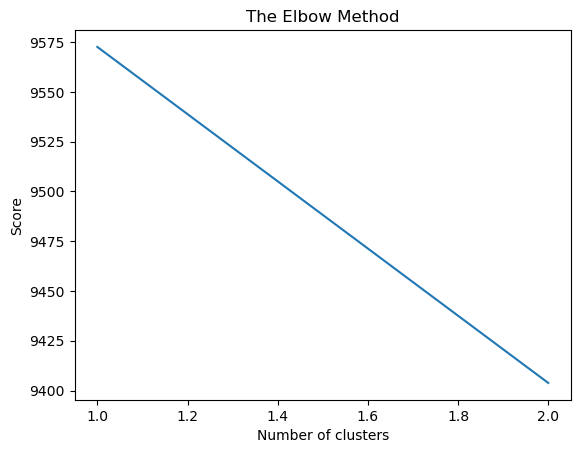

In [13]:
from sklearn.cluster import KMeans

score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [14]:
k_clusters = 2

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_train_vc)

KMeans(max_iter=600, n_clusters=2, n_init=10, random_state=0, tol=1e-06)

In [15]:
clusters = model.predict(X_train_vc)
type(clusters)

numpy.ndarray

In [16]:
dataset["ClusterName"] = clusters
dataset.head(20)

,Text,ClusterName
68879,preheat oven degre melt butter inch enamel cas...,0
62231,tablespoon unsalt butter soften plu greas cup ...,1
27359,lard grapese oil cook cup masa harina egg yolk...,1
32888,food processor combin flour salt egg oil table...,0
59266,cup ground grit cup cream tablespoon unsalt bu...,1
28894,cup unsalt butter regular butter margarin cup ...,1
74699,heavi kettl cook onion prosciutto garlic chili...,0
24179,ounc packag devil food chocol cake mi ounc pac...,1
36002,muddl raspberri sugar rock glass fill cocktail...,0
54542,pound red potato unpeel quarter cup plu tables...,1


c:\Users\seren\.conda\envs\snowflakes\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\seren\.conda\envs\snowflakes\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


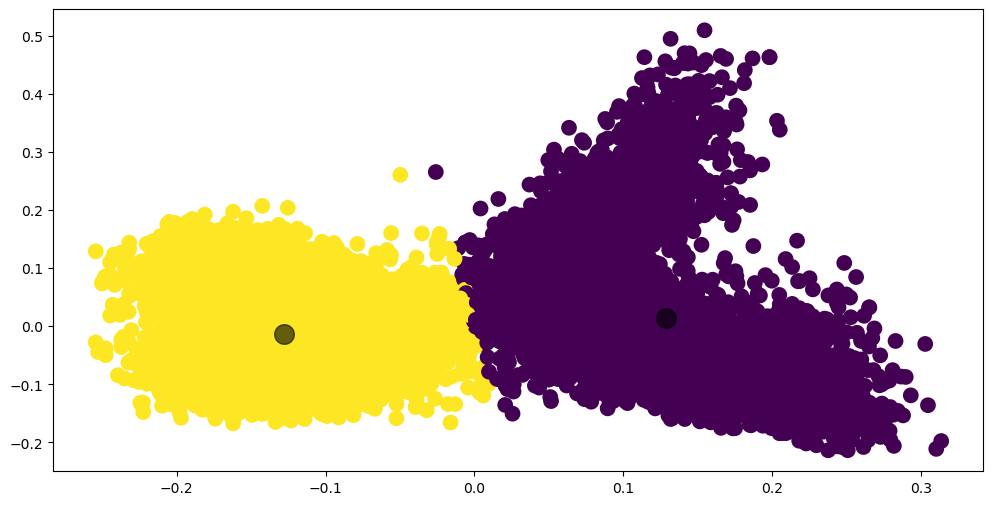

In [17]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(12, 6))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [20]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])



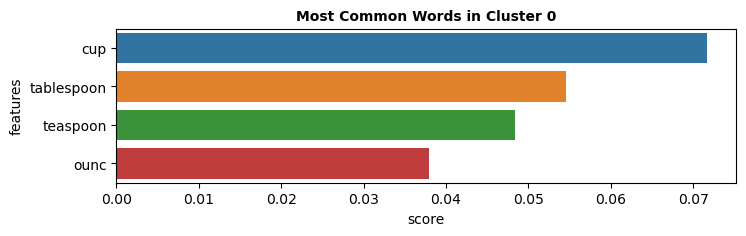

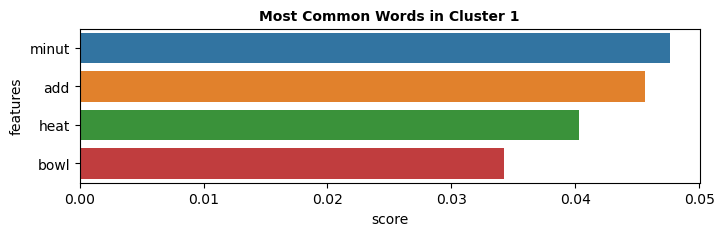

In [21]:
dfs = get_top_features_cluster(X_train_vc.toarray(), prediction, 4)
plotWords(dfs, 4)

In [23]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: minut add
Cluster 1: cup tablespoon


In [24]:
#predictions
cleaned_data = ['In a medium bowl combine the buttermilk, mayo, chives, salt, garlic powder, onion powder, parsley,', '1/2 cup 1% buttermilk', '3 tablespoons mayonnaise', '2 tablespoon fresh finely chopped chives','1/2 cup freshly grated Parmesan (not pre-grated using the large holes of a box grater)',"'16 oz strawberries (washed and cut)', '4 oz low fat sour cream', '2 tbsp brown sugar'"]
cleaned_data = pd.DataFrame(cleaned_data, columns=["Text"])
cleaned_data = cleaned_data["Text"].apply(clean_text)
predicted = model.predict(vectorizer.transform(cleaned_data))
predicted

array([0, 1, 1, 1, 1, 1])

In [32]:
from parse_ingredients import parse_ingredient ##https://pypi.org/project/parse-ingredients/

result = parse_ingredient('1/2 cup freshly grated Parmesan (not pre-grated using the large holes of a box grater)')
print(f"Found results: \n {result}")

Found results: 
 Ingredient(name='freshly grated Parmesan', quantity=1.5, unit='cup', comment='(not pre-grated using the large holes of a box grater)', original_string='1/2 cup freshly grated Parmesan (not pre-grated using the large holes of a box grater)')


In [31]:
#sudo code: from cleaned_data, if predicted[i] == 0, then parese_ingredient(cleaned_data[i]) 
#which returns dic of ingredient and quantity 
